In [5408]:
import struct
import numpy as np
from array import array
import matplotlib.pyplot as plt
import os
import numpy.linalg as LA

In [5409]:
def load_mnist(dataset="training", selecteddigits=range(10), path=r"/Users/gholami/Documents/ucsc machine learning/assignment 3/MNIST_data"):

    #Check training/testing specification. Must be "training" (default) or "testing"
    if dataset == "training":
        fname_digits = os.path.join(path, 'train-images-idx3-ubyte')
        fname_labels = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset == "testing":
        fname_digits = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_labels = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")
        
    #Import digits data
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", digitsfileobject.read(16))
    digitsdata = array("B", digitsfileobject.read())
    digitsfileobject.close()

    #Import label data
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size = struct.unpack(">II", labelsfileobject.read(8))
    labelsdata=array("B",labelsfileobject.read())
    labelsfileobject.close()
    
    #Find indices of selected digits
    indices=[k for k in range(size) if labelsdata[k] in selecteddigits]
    N=len(indices)
    
    #Create empty arrays for X and T
    X = np.zeros((N, rows*cols), dtype=np.uint8)
    T = np.zeros((N, 1), dtype=np.uint8)
    
    #Fill X from digitsdata
    #Fill T from labelsdata
    for i in range(N):
        X[i] = digitsdata[indices[i]*rows*cols:(indices[i]+1)*rows*cols]
        T[i] = labelsdata[indices[i]]
    
    return X,T

In [5410]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [5411]:
excelfile=r"/Users/gholami/Documents/ucsc machine learning/assignment 3/Assignment_3_ Submission_Template.xlsx";
excelfile_c=r"/Users/gholami/Documents/ucsc machine learning/assignment 3/Assignment_3_ Submission_Template copy.xlsx";
X, T = load_mnist(dataset="training",selecteddigits=[8,9])
TF = T.flatten()

In [5412]:
print("Checking shape of matrix:", X.shape)
print("Checking min/max values:",(np.amin(X),np.amax(X)))
print("Checking unique labels in T:",list(np.unique(T)))

('Checking shape of matrix:', (11800, 784))
('Checking min/max values:', (0, 255))
('Checking unique labels in T:', [8, 9])


Checking one training vector by plotting image:


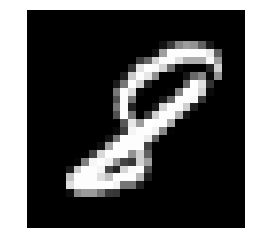

In [5413]:
print("Checking one training vector by plotting image:")
vectortoimg(X[-20])

Checking multiple training vectors by plotting images.
Be patient:


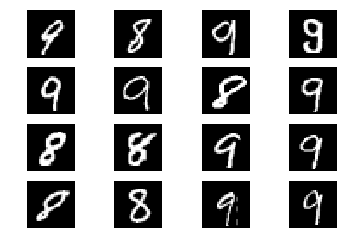

In [5414]:
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure()
nrows=4
ncols=4
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(X[np.random.randint(len(T))],show=False)
plt.show()

Z

In [5415]:
m=np.mean(X,axis=0);
getSheetNames(excelfile)
writeExcelData(np.reshape(m,(1,len(m))),excelfile,'Results',2,2)
#m
#np.reshape(m,(1,len(m))).shape

In [5416]:
Z=X-m;
print(np.mean(Z,axis=0))

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

C

In [5417]:
C=np.cov(Z,rowvar=False);

V

In [5418]:
[L,V]=LA.eigh(C);
print(V.shape)
print(V[:,783])
print(L[783])
print(L[0])

(784, 784)
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.0

In [5419]:
row=V[0,:];col=V[:,0];

In [5420]:
print(np.dot(C,row)-(L[0]*row));#If the matrix product C.row is the same as λ[0]*row, this should evaluate to [0,0,0]

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [5421]:
print(np.dot(C,col)-(L[0]*col));#If the matrix product C.col is the same as λ[0]*col, this should evaluate to [0,0,0]

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [5422]:
#Eigenvectors are in columns with most principal one as the last column
L=np.flipud(L);V=np.flipud(V.T); #V's are row vectors with biggest one on the 1st row
row=V[0,:]; #Check once again
print(np.dot(C,row)-(L[0]*row));#If the matrix product C.row is the same as λ[0]*row, this should evaluate to [0,0,0]

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [5423]:
print(np.allclose(np.dot(C,row),L[0]*row))

True


In [5424]:
print(LA.norm(V[1,:]))
writeExcelData(np.reshape(V[0,:],(1,len(V[0,:]))),excelfile,'Results',3,2)
writeExcelData(np.reshape(V[1,:],(1,len(V[1,:]))),excelfile,'Results',4,2)

1.0


[[  1.27551020e-03  -1.62900409e-06  -1.62900409e-06 ...,  -1.62900409e-06
   -1.62900409e-06  -1.62900409e-06]
 [ -1.62900409e-06   1.27551020e-03  -1.62900409e-06 ...,  -1.62900409e-06
   -1.62900409e-06  -1.62900409e-06]
 [ -1.62900409e-06  -1.62900409e-06   1.27551020e-03 ...,  -1.62900409e-06
   -1.62900409e-06  -1.62900409e-06]
 ..., 
 [ -1.62900409e-06  -1.62900409e-06  -1.62900409e-06 ...,   1.27551020e-03
   -1.62900409e-06  -1.62900409e-06]
 [ -1.62900409e-06  -1.62900409e-06  -1.62900409e-06 ...,  -1.62900409e-06
    1.27551020e-03  -1.62900409e-06]
 [ -1.62900409e-06  -1.62900409e-06  -1.62900409e-06 ...,  -1.62900409e-06
   -1.62900409e-06   1.27551020e-03]]
True
1.0
-1.87350135405e-16
(784, 784)


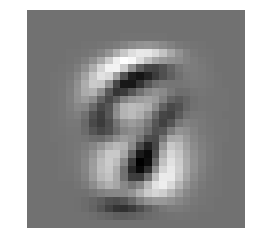

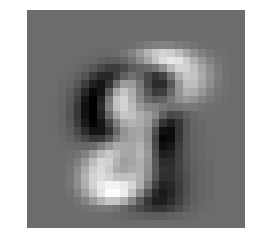

In [5425]:
CV=np.cov(V,rowvar=False)
print CV  #diagonal
print(np.allclose(V.T, LA.inv(V)))  #orthonormal vectors have dot(V[1,:],V[2,:])=0 and 1 dot(V[1,:],V[1,:].T)=1
print(LA.norm(V[1])) #1st row vector V[i] are normalized to 1
print(np.dot(V[0,:],V[1,:])) # Orthogonal vectors with zero dot product
print(V.shape)
vectortoimg(V[1])
vectortoimg(V[0,:]) #same as V[0]

P

In [5426]:
print(L[0]);
print(L[1]);
P=np.dot(Z,V.T);
CP=np.cov(P,rowvar=False)
print CP  #diagonal preserving maximum variance as the first eigenvalue on the diagonal axis

356648.968477
264675.146021
[[  3.56648968e+05  -1.99698798e-11  -2.95798911e-11 ...,  -6.44447583e-11
   -3.98713121e-12  -1.13401363e-10]
 [ -1.99698798e-11   2.64675146e+05  -1.55032965e-10 ...,  -7.54565189e-12
    3.14948510e-11  -9.21832987e-11]
 [ -2.95798911e-11  -1.55032965e-10   2.03345422e+05 ...,  -9.69684371e-12
    9.69297666e-13   2.07257647e-12]
 ..., 
 [ -6.44447583e-11  -7.54565189e-12  -9.69684371e-12 ...,   2.06669816e-21
   -3.39463726e-22   1.18062636e-22]
 [ -3.98713121e-12   3.14948510e-11   9.69297666e-13 ...,  -3.39463726e-22
    3.34575942e-22   2.74618270e-24]
 [ -1.13401363e-10  -9.21832987e-11   2.07257647e-12 ...,   1.18062636e-22
    2.74618270e-24   8.68396723e-23]]


R

In [5427]:
R=np.dot(P,V);
print(R-Z) #Z is recovered since R-Z is seen to contain very small values

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


Xrec

In [5428]:
Xrec=R+m;
print(Xrec-X) #X is recovered since Xrec-X is seen to contain very small values
print(np.allclose(Xrec, X))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
True


Dimension reduction

In [5429]:
Xrec1=(np.dot(P[:,0:1],V[0:1,:]))+m;print(Xrec1) #Reconstruction using 1 component
print(np.allclose(Xrec1, X))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
False


In [5430]:
Xrec2=(np.dot(P[:,0:2],V[0:2,:]))+m;#print(Xrec2) #Reconstruction using 2 components
print(np.allclose(Xrec2, X))

False


In [5431]:
Xrec690=(np.dot(P[:,0:690],V[0:690,:]))+m;#print(Xrec690) #Reconstruction using 690 components (X is recovered)
print(np.allclose(Xrec690, X))

True


Create Scatter Plot

In [5432]:
def scatterplot(rseed,labeln,labelp,T,X):
    # For best effect, points should not be drawn in sequence but in random order
    np.random.seed(rseed)
    randomorder=np.random.permutation(np.arange(len(T)))
    #print randomorder
    #randomorder=np.arange(len(T))

    # Set colors
    cols=np.zeros((len(T),4))     # Initialize matrix to hold colors
    cols[T==labeln]=[1,0,0,0.25] # Negative points are red (with opacity 0.25)
    cols[T==labelp]=[0,1,0,0.25] # Positive points are green (with opacity 0.25)
    #print cols.shape

    # Draw scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='black')
    ax.scatter(X[randomorder,1],X[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
    ax.set_aspect('equal')

    plt.gca().invert_yaxis()
    plt.show()


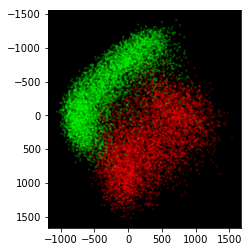

In [5433]:
scatterplot(0,8,9,TF,P)

# For best effect, points should not be drawn in sequence but in random order
labeln=[8]
labelp=[9]
print(len(T))
np.random.seed(0)
randomorder=np.random.permutation(np.arange(len(T)))
print randomorder
print(randomorder.shape)
randomorder=np.arange(len(T))
#print randomorder

# Set colors
cols=np.zeros((len(T),4))     # Initialize matrix to hold colors
for i,t in enumerate(T):
    if t==labeln:
        cols[i]= [1,0,0,0.25]
    elif t==labelp:
        cols[i] = [0,1,0,0.25]

#cols[T==[8]]=[0,1,0,0.25] # Positive points are green (with opacity 0.25)

# Draw scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='black') #111 mean 1x1 grid 1'st subplot
ax.scatter(P[randomorder,1],P[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal')

plt.gca().invert_yaxis()
plt.show()

In [5434]:
def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values

In [5435]:
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    from pandas import read_excel
    values=(read_excel(excelfile, sheetname,header=None)).values;
    return values[startrow-1:endrow,startcol-1:endcol]

In [5436]:
def readExcel(excelfile,**args):
    if args:
        data=readExcelRange(excelfile,**args)
    else:
        data=readExcelSheet1(excelfile)
    if data.shape==(1,1):
        return data[0,0]
    elif (data.shape)[0]==1:
        return data[0]
    else:
        return data

In [5437]:
def writeExcelData(x,excelfile,sheetname,startrow,startcol):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()

In [5438]:
def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names

In [5439]:
def BF(x,B,hmin,hmax,smin,smax):
    r = (np.round(((B-1)*(x[0]-hmin)/(hmax-hmin)))).astype('int32');
    c = (np.round(((B-1)*(x[1]-smin)/(smax-smin)))).astype('int32');
    return[r,c]

In [5440]:
def Build2DHistogramClassifier(X,T,B,xmin,xmax):
    HF=np.zeros([B,B]).astype('int32');
    HM=np.zeros([B,B]).astype('int32');
    RC=(np.round(((B-1)*(X-xmin)/(xmax-xmin)))).astype('int32');

    for i,rc in enumerate(RC):
        if T[i]==labelp:
            HF[rc[0],rc[1]]+=1;
        else:
            HM[rc[0],rc[1]]+=1;
            
    return [HF,HM]

In [5441]:
def Apply2DHistogramClassifier(queries, HF, HM, xmin, xmax):
    B = np.alen(HF);
    RC=(np.round(((B-1)*(queries-xmin)/(xmax-xmin)))).astype('int32');
    countF = HF[RC[:,0],RC[:,1]]; #multiple queries
    countM = HM[RC[:,0],RC[:,1]];
    
    resultlabel = np.full(np.alen(RC),"Indeterminate", dtype=object);
    indicesF = countF > countM;
    indicesM = countM > countF;
    resultlabel[indicesF]=labelp;
    resultlabel[indicesM]=labeln;
    resultprob = countF*1.0/(countF+countM);
    return resultlabel, resultprob

    
    
    

In [5442]:
def Build2DBayesianClassifier(X,T):
    muF = np.mean(X[T==labelp],axis=0);
    muM = np.mean(X[T==labeln],axis=0);
    sigmaF=np.cov(X[T==labelp],rowvar=False);
    sigmaM=np.cov(X[T==labeln],rowvar=False);

    NF = len(T[T==labelp]);
    NM = len(T[T==labeln]);
    return [muF,muM,sigmaF,sigmaM,NF,NM]
    

In [5443]:
def pdf(x,mu,sigma):
    from numpy.linalg import det
    d = np.alen(mu)
    dfact1 = (2*np.pi)**d
    dfact2 = det(sigma) #sigma is variance
    fact = 1/np.sqrt(dfact1*dfact2)
    xc=x-mu
    isigma=np.linalg.inv(sigma)
    return fact*np.exp(-0.5*np.einsum('ij,jk,ik->i',xc,isigma,xc));

In [5444]:
def Apply2DBayesianClassifier(queries,muF,muM,sigmaF,sigmaM,NF,NM):

    countF=NF*pdf(queries,muF,sigmaF) #for a width of 1
    countM=NM*pdf(queries,muM,sigmaM)
    resultlabel=np.full(np.alen(queries),"Indeterminate",dtype=object);
    indicesF=countF>countM;
    indicesM=countM>countF;
    resultlabel[indicesF]=labelp;
    resultlabel[indicesM]=labeln;
    resultprob=countF/(countF+countM);
    return resultlabel, resultprob


Prepare Data

In [5445]:
#data=readExcel(excelfile)
P2 = P[:,0:2]
P2

array([[-326.65422188, -724.71921067],
       [ 944.25387473, -262.36694033],
       [ 345.91053112, -644.75351888],
       ..., 
       [ 215.11274999, -520.28883445],
       [ 736.5578797 ,  303.45877315],
       [ 482.71588029, -348.7548154 ]])

Histogram Classifier

In [5446]:
num = len(P2)
#B = int(round(math.log(num,2))+1);
B=25
xmin = np.amin(P2,axis=0);
xmax = np.amax(P2,axis=0);

[HF,HM] = Build2DHistogramClassifier(P2,T,B,xmin,xmax);
#print(HF);
print xmin
print (xmax.shape)
print(HF.shape)
print np.reshape(xmin,(2,1))
writeExcelData(np.reshape(xmin,(2,1)),excelfile,'Results',17,2)
writeExcelData(np.reshape(xmax,(2,1)),excelfile,'Results',17,3)
writeExcelData(HF,excelfile,'Results',20,2)
writeExcelData(HM,excelfile,'Results',46,2)

[-1408.75937014 -1057.66325091]
(2,)
(25, 25)
[[-1408.75937014]
 [-1057.66325091]]


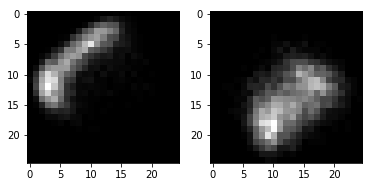

In [5447]:
plt.subplot(1,2,1);
plt.imshow(HF,interpolation='None',cmap=plt.get_cmap('gray'));
plt.subplot(1,2,2);
plt.imshow(HM,interpolation='None',cmap=plt.get_cmap('gray'));
plt.show() #it's not gaussian

In [5448]:
queries = P2;
print(queries.shape, "query size")
[resultHlabel, resultHprob]=Apply2DHistogramClassifier(queries, HF, HM, xmin, xmax)
[resultHlabel, resultHprob]
print(resultHlabel);
print(T.shape) #it's not an 1 dimension array
print(resultHlabel.shape)
print(T.flatten().shape)
check = T.flatten()==resultHlabel;
print(check.shape)
print(check)
print(resultHprob);
print(len(check[check==False])*100.0/len(check));
print(len(check[check==True])*100.0/len(check));
writeExcelData([len(check[check==True])*100.0/len(check)],excelfile,'Results',97,2)

((11800, 2), 'query size')
[9 8 9 ..., 9 8 8]
(11800, 1)
(11800,)
(11800,)
(11800,)
[ True  True  True ...,  True  True  True]
[ 1.          0.          0.97647059 ...,  0.93650794  0.          0.28571429]
4.62711864407
95.3728813559


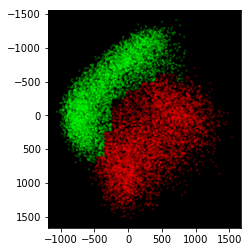

In [5449]:
scatterplot(0,8,9,resultHlabel,queries)

np.random.seed(0)
randomorder=np.random.permutation(np.arange(len(resultHlabel)))
print randomorder
print (labeln)
print (resultHlabel.shape)
#randomorder=np.arange(len(resultHlabel))
#print randomorder

# Set colors
cols=np.zeros((len(resultHlabel),4))     # Initialize matrix to hold colors
print (cols.shape)
for i,t in enumerate(resultHlabel):
    if t==8:
        cols[i]= [1,0,0,0.25]
    elif t==9:
        cols[i] = [0,1,0,0.25]

# Draw scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(queries[randomorder,1],queries[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal')

plt.gca().invert_yaxis()
plt.show()
print ('plot is complete')

In [5450]:
#writeExcelData([hmin,hmax,smin,smax],excelfile,'Reconstructed Female Histogram',1,2)
#writeExcelData([hmin,hmax,smin,smax],excelfile,'Reconstructed Male Histogram',1,2)
#writeExcelData([c],excelfile,'Reconstructed Female Histogram',6,2)
#writeExcelData([c],excelfile,'Reconstructed Male Histogram',6,2)

Bayesian Classifier

In [5451]:
TF = T.flatten() #from matrix to array
[muF,muM,sigmaF,sigmaM,NF,NM]=Build2DBayesianClassifier(P2,TF)

print(P2.shape,T.shape,muF.shape,TF.shape);
print(muF,muM,sigmaF,sigmaM,NF,NM);
#NFA=[NF]
writeExcelData([NF],excelfile,'Results',6,2)
writeExcelData([NM],excelfile,'Results',7,2)
print (muF.shape)
writeExcelData(np.reshape(muF,(1,2)),excelfile,'Results',9,2)
writeExcelData(np.reshape(muM,(1,2)),excelfile,'Results',10,2)
writeExcelData(sigmaF,excelfile,'Results',12,2)
writeExcelData(sigmaM,excelfile,'Results',14,2)


((11800, 2), (11800, 1), (2,), (11800,))
(array([-373.59298741, -299.75757737]), array([ 379.85039858,  304.77829906]), array([[ 221379.47322285, -138698.79796941],
       [-138698.79796941,  172761.42217704]]), array([[ 208000.78961728,  -88650.14795447],
       [ -88650.14795447,  173892.95298864]]), 5949, 5851)
(2,)


In [5452]:
[resultBlabel, resultBprob]=Apply2DBayesianClassifier(queries,muF,muM,sigmaF,sigmaM,NF,NM)

In [5453]:
print(resultBlabel,resultBlabel.shape);
print(resultBprob);
checkB = TF==resultBlabel;

print(len(checkB[checkB==True])*100.0/len(checkB));
writeExcelData([len(checkB[checkB==True])*100.0/len(checkB)],excelfile,'Results',98,2)

(array([9, 8, 9, ..., 9, 8, 8], dtype=object), (11800,))
[  9.99092213e-01   1.02040216e-03   9.16667942e-01 ...,   9.10077753e-01
   6.14003502e-06   1.92589127e-01]
94.406779661


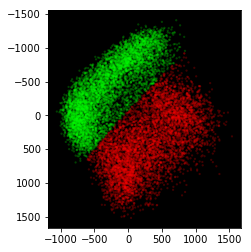

In [5454]:
scatterplot(0,8,9,resultBlabel,queries)

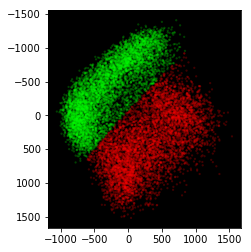

In [5104]:
np.random.seed(0)
randomorder=np.random.permutation(np.arange(len(resultBlabel)))
#randomorder=np.arange(len(resultBlabel))

# Set colors
cols=np.zeros((len(resultBlabel),4))     # Initialize matrix to hold colors
for i,t in enumerate(resultBlabel):
    if t==8:
        cols[i]= [1,0,0,0.25]
    elif t==9:
        cols[i] = [0,1,0,0.25]

# Draw scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(queries[randomorder,1],queries[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal')

plt.gca().invert_yaxis()
plt.show()

Test xp and xn

In [5105]:
indexn = -1
indexp = -1
for i,t in enumerate(T):
    if indexn >= 41 and indexp >= 60: break;
    if t == labeln:
        xn = X[i]
        indexn = i
    elif t == labelp:
        xp = X[i];
        indexp = i
print( indexn,indexp,T[indexn],T[indexp],xn, xp);
type(labelp)
writeExcelData(np.reshape(xp,(1,784)),excelfile,'Results',74,2)
writeExcelData(np.reshape(xn,(1,784)),excelfile,'Results',80,2)
writeExcelData(labelp,excelfile,'Results',88,2)
writeExcelData(labeln,excelfile,'Results',92,2)

(60, 61, array([8], dtype=uint8), array([9], dtype=uint8), array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 139, 253, 253,
       172, 132, 132,  35,   2,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 190, 253,
       252, 252, 236, 245, 252, 252,  47,   0,   0,   0,   0,   0,   0,
     

In [5106]:
def pcp(X,m,V):
    Z=X-m;
    P2=np.dot(Z,V.T)[0:2];
    R=np.dot(P2,V[0:2,:]);
    Xrec=R+m;
    return(Z,P2,R,Xrec);

Reconstructed Histograms

In [5107]:
(zp,pp,rp,xrecp) = pcp(xp,m,V)
(zn,pn,rn,xrecn) = pcp(xn,m,V)
print(zp.shape)
#print(np.allclose(cp, np.zeros((784,784)) ))
writeExcelData(np.reshape(zp,(1,784)),excelfile,'Results',75,2)
writeExcelData(np.reshape(zn,(1,784)),excelfile,'Results',81,2)
writeExcelData(np.reshape(pp,(1,2)),excelfile,'Results',76,2)
writeExcelData(np.reshape(pn,(1,2)),excelfile,'Results',82,2)
writeExcelData(np.reshape(rp,(1,784)),excelfile,'Results',77,2)
writeExcelData(np.reshape(rn,(1,784)),excelfile,'Results',83,2)
writeExcelData(np.reshape(xrecp,(1,784)),excelfile,'Results',78,2)
writeExcelData(np.reshape(xrecn,(1,784)),excelfile,'Results',84,2)

print pn

(784,)
[ 1001.44783253   -33.60027533]


In [5108]:
qnqp = np.vstack((pn,pp))
print(qnqp, qnqp.shape)
[resultH1label, resultH1prob]=Apply2DHistogramClassifier(qnqp, HF, HM, xmin, xmax)
print(resultH1label, resultH1prob)
H1probn=1.0-resultH1prob[0]
print H1probn
writeExcelData([resultH1label[0]],excelfile,'Results',93,2)
writeExcelData([resultH1label[1]],excelfile,'Results',89,2)
writeExcelData([H1probn],excelfile,'Results',93,3)
writeExcelData([resultH1prob[1]],excelfile,'Results',89,3)

(array([[ 1001.44783253,   -33.60027533],
       [ -830.70658745,   -60.31360217]]), (2, 2))
(array([8, 9], dtype=object), array([ 0.,  1.]))
1.0


In [5109]:
[resultB1label, resultB1prob]=Apply2DBayesianClassifier(qnqp,muF,muM,sigmaF,sigmaM,NF,NM)
print(resultB1label,resultB1prob)
#print(np.linspace(1,10,5))

(array([8, 9], dtype=object), array([  2.72442389e-05,   9.97773639e-01]))


In [5110]:
writeExcelData([resultB1label[0]],excelfile,'Results',94,2)
writeExcelData([resultB1label[1]],excelfile,'Results',90,2)
writeExcelData([1-resultB1prob[0]],excelfile,'Results',94,3)
writeExcelData([resultB1prob[1]],excelfile,'Results',90,3)


In [2939]:
[htmin, hsmin]=xmin;
[htmax,hsmax]=xmax;
HFrec=np.zeros_like(HF);
HMrec=np.zeros_like(HM);
bA=(htmax-htmin)*(hsmax-hsmin)/((B-1)**2) #each bin area
for r,ht in enumerate(np.linspace(htmin,htmax,B)):#center of the bin
    for c,hs in enumerate(np.linspace(hsmin,hsmax,B)):
        print(pdf([[ht,hs]],muF,sigmaF).shape,pdf([[ht,hs]],muF,sigmaF),pdf([[ht,hs]],muF,sigmaF)[0])
        HFrec[r,c]=(np.round(NF*bA*pdf([[ht,hs]],muF,sigmaF)[0])).astype('int32') #gets the element of array as int32
        HMrec[r,c]=(np.round(NM*bA*pdf([[ht,hs]],muM,sigmaM)[0])).astype('int32')
print(HFrec.shape,htmin,htmax)
print(np.linspace(htmin,htmax,B))

((1,), array([  1.02007763e-12]), 1.0200776283302215e-12)
((1,), array([  5.60240262e-12]), 5.6024026181997089e-12)
((1,), array([  2.68510636e-11]), 2.6851063606226954e-11)
((1,), array([  1.12303878e-10]), 1.1230387823225955e-10)
((1,), array([  4.09896395e-10]), 4.0989639500447445e-10)
((1,), array([  1.30556809e-09]), 1.3055680910863715e-09)
((1,), array([  3.62886690e-09]), 3.6288668985645835e-09)
((1,), array([  8.80214736e-09]), 8.8021473624455889e-09)
((1,), array([  1.86316928e-08]), 1.8631692791795582e-08)
((1,), array([  3.44161335e-08]), 3.4416133536631094e-08)
((1,), array([  5.54776333e-08]), 5.5477633261320604e-08)
((1,), array([  7.80404664e-08]), 7.8040466398351084e-08)
((1,), array([  9.58005210e-08]), 9.5800520996166866e-08)
((1,), array([  1.02627079e-07]), 1.0262707931055386e-07)
((1,), array([  9.59405385e-08]), 9.5940538465104974e-08)
((1,), array([  7.82687535e-08]), 7.8268753544973099e-08)
((1,), array([  5.57212393e-08]), 5.5721239340172111e-08)
((1,), array([

((1,), array([  6.67345837e-07]), 6.6734583713695378e-07)
((1,), array([  4.59668844e-07]), 4.5966884447415298e-07)
((1,), array([  2.76302787e-07]), 2.76302787377032e-07)
((1,), array([  1.44934423e-07]), 1.449344233814341e-07)
((1,), array([  6.63443451e-08]), 6.6344345135123694e-08)
((1,), array([  2.65022264e-08]), 2.6502226421871761e-08)
((1,), array([  9.23861549e-09]), 9.238615490232164e-09)
((1,), array([  2.81046064e-09]), 2.8104606444345444e-09)
((1,), array([  7.46095134e-10]), 7.4609513448042426e-10)
((1,), array([  1.72845068e-10]), 1.7284506779404953e-10)
((1,), array([  3.49434562e-11]), 3.4943456229853339e-11)
((1,), array([  6.16482580e-12]), 6.1648258038197255e-12)
((1,), array([  9.49121572e-13]), 9.4912157178589946e-13)
((1,), array([  1.27517257e-13]), 1.2751725717818356e-13)
((1,), array([  1.29061081e-08]), 1.290610805187487e-08)
((1,), array([  3.61207566e-08]), 3.6120756586041838e-08)
((1,), array([  8.82194740e-08]), 8.8219473988108322e-08)
((1,), array([  1.8

((1,), array([  2.89348024e-17]), 2.8934802358918267e-17)
((1,), array([  2.51685203e-18]), 2.5168520290410295e-18)
((1,), array([  1.91047311e-19]), 1.91047311276191e-19)
((1,), array([  1.26552364e-20]), 1.2655236350521937e-20)
((1,), array([  7.31552796e-22]), 7.3155279643087855e-22)
((1,), array([  3.69034673e-23]), 3.6903467317623375e-23)
((1,), array([  1.62455625e-24]), 1.6245562549504364e-24)
((1,), array([  6.24091719e-26]), 6.2409171928814042e-26)
((1,), array([  1.21826626e-08]), 1.2182662620653351e-08)
((1,), array([  9.74922977e-09]), 9.7492297721190856e-09)
((1,), array([  6.80839084e-09]), 6.8083908378798421e-09)
((1,), array([  4.14920349e-09]), 4.1492034937698799e-09)
((1,), array([  2.20663791e-09]), 2.2066379095273636e-09)
((1,), array([  1.02410267e-09]), 1.0241026709514462e-09)
((1,), array([  4.14764909e-10]), 4.1476490941850017e-10)
((1,), array([  1.46590760e-10]), 1.4659076045010822e-10)
((1,), array([  4.52123700e-11]), 4.5212369986647744e-11)
((1,), array([  

In [2940]:
queries = P2;
[resultHrlabel, resultHrprob]=Apply2DHistogramClassifier(queries, HFrec, HMrec, xmin, xmax)
[resultHrlabel, resultHrprob]
print(resultHrlabel);
checkr = T.flatten()==resultHrlabel;
print(checkr.shape)
print(resultHrprob);
print(len(checkr[checkr==True])*100.0/len(checkr));


[9 8 9 ..., 9 8 8]
(11800,)
[ 1.          0.          0.93939394 ...,  0.93181818  0.          0.2       ]
94.5423728814


/Users/gholami/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


(11800, 4)


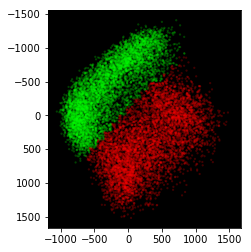

plot is complete


In [2941]:
np.random.seed(4)
randomorder=np.random.permutation(np.arange(len(resultHlabel)))

# Set colors
cols=np.zeros((len(resultHrlabel),4))     # Initialize matrix to hold colors
print (cols.shape)
for i,t in enumerate(resultHrlabel):
    if t==8:
        cols[i]= [1,0,0,0.25]
    elif t==9:
        cols[i] = [0,1,0,0.25]

# Draw scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(queries[randomorder,1],queries[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal')

plt.gca().invert_yaxis()
plt.show()
print ('plot is complete')

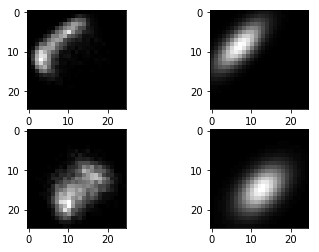

In [2942]:
plt.subplot(2,2,1);
plt.imshow(HF,interpolation='None',cmap=plt.get_cmap('gray'));
plt.subplot(2,2,2);
plt.imshow(HFrec,interpolation='None',cmap=plt.get_cmap('gray'));
plt.subplot(2,2,3); #gaussian model
plt.imshow(HM,interpolation='None',cmap=plt.get_cmap('gray'));
plt.subplot(2,2,4); #gaussian model
plt.imshow(HMrec,interpolation='None',cmap=plt.get_cmap('gray'));
plt.show()

In [2943]:
[np.sum(H) for H in [HF, HM, HFrec, HMrec]]

[5949, 5851, 5725, 5810]